# Regression

In this tutorial we will investigate how to do a regression in python

Objectives:
- Perform a simple linear regression
- Perform a multiple linear regression
- 

For the tutorial we will use the following libraries:
- pandas
- numpy
- matplotlib
- sklearn (dataset, linear_model)
- seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from sklearn import datasets, linear_model
import seaborn as sns

## The boston house price dataset

For this tutorial we will use a pre-existing dataset from the `sklearn` library.

Here is the official description of the dataset:

Boston House Prices dataset
- `CRIM`     per capita crime rate by town
- `ZN`       proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS`    proportion of non-retail business acres per town
- `CHAS`     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- `NOX`      nitric oxides concentration (parts per 10 million)
- `RM`       average number of rooms per dwelling
- `AGE`      proportion of owner-occupied units built prior to 1940
- `DIS`      weighted distances to five Boston employment centres
- `RAD`      index of accessibility to radial highways
- `TAX`      full-value property-tax rate per \$10,000
- `PTRATIO`  pupil-teacher ratio by town
- `B`        1000(Bk - 0.63)$^2$ where Bk is the proportion of blacks by town
- `LSTAT`     lower status of the population
- `MEDV`    Median value of owner-occupied homes in \$1000's

The full description:
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

The package description of the dataset: 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

With the dataset, the target variable is the house price, i.e `MEDV`


In [3]:
data=datasets.load_boston()

This dataset contains different part: the numeric data is in the `data` an array, the names of the variable  are in `feature_names`, the target value $Y_i$ is in `target`. So we will do some manipulation, to transform the data in a panda dataframe.

In [4]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
data['data'] #the numeric dataset

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
data['feature_names'] #the name of variables

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

The `df` variable will store the data frame

In [7]:
df = pd.DataFrame(data.data, columns=data.feature_names) 

The target value, i.e. house price, will be store in a separate variable `house_price`

In [8]:
house_price=pd.DataFrame(data.target, columns=["MEDV"])

In [9]:
df.head() # this will show the top of the dataset, i.e. the first few rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
house_price.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Simple linear regression

A simple linear regression models a linear relationship between two variables. 

$$Y_i=X_i+e_i$$



Text(0.5,1,'House prices in Boston')

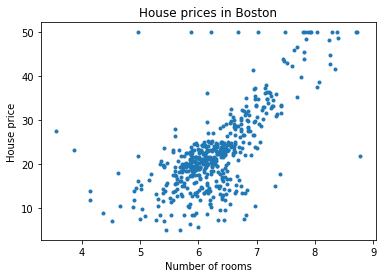

In [11]:
plt.plot(df['RM'],house_price,'.')
plt.xlabel("Number of rooms")
plt.ylabel("House price")
plt.title("House prices in Boston")

The `seaborn` library plots directly a line through the scatter plot, however to use seaborn we have to create a special datafame with the two variables we want to plot.

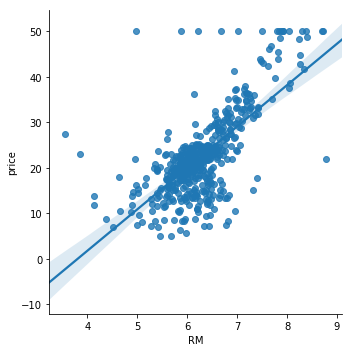

In [12]:
df2=pd.DataFrame({'RM':df.RM,'price':house_price.MEDV }) # transform data into a new dataframe
sns.lmplot('RM','price',data=df2) # linear plot

From this plot, how do you describe the relatioship between the house price and the number of rooms?

*Write your answer here*

Let's build a simple linear model:
$$price = a \times nb\_ of\_ rooms + b$$

In [13]:
x=df['RM'].values.reshape(-1, 1) ## this is necessary to use the regression function

In [14]:
y=house_price

We will use the `linear_model.LinearRegression()` to fit the following equation:
    $$y=ax+b$$

In [15]:
model=linear_model.LinearRegression()

In [16]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

With the `fit` function, we obtain `a` the `coef_` and `b` the `ìntercept_`

In [17]:
model.coef_

array([[9.10210898]])

In [18]:
model.intercept_

array([-34.67062078])

In this case the equation is:
    $$y=9.10\times x -34.67$$
$$price=9.10\times nb\_ of\_ rooms-34.67$$

How do you interpret these numbers?

*Write your answers here*

This equations matches the lines that goes through the data, let's plot it.

In order to plot it we will predict the price of houses with 4 to 9 rooms.

In [19]:
xpred=np.arange(4,10).reshape(-1,1)

In [20]:
ypred=model.predict(xpred)

In [21]:
(xpred,ypred)

(array([[4],
        [5],
        [6],
        [7],
        [8],
        [9]]), array([[ 1.73781515],
        [10.83992413],
        [19.94203311],
        [29.04414209],
        [38.14625107],
        [47.24836005]]))

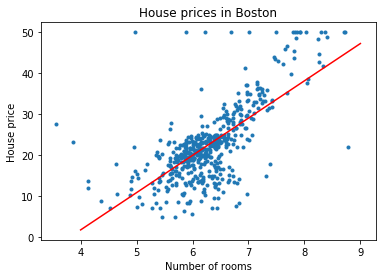

In [22]:
plt.plot(df['RM'],house_price,'.')
plt.xlabel("Number of rooms")
plt.ylabel("House price")
plt.title("House prices in Boston")
plt.plot(xpred,ypred,'r')

## Multiple regression

The price of houses is not only explained by the number of rooms, but also by the distanc efrom teh city center, and all the other variables from the dataset. So we need to build a linear model that takes all the variables into account:

$$y_i=a_1 \times x_i^1 + a_2 \times x_i^2 + \dots + a_p \times x_i^p$$

$$price=a_1 \times nbroom + a_2 \times distance + \dots + a_p \times stat$$


In [23]:
model2 = linear_model.LinearRegression()

In [24]:
x=df.copy() # now we include all the variables

In [25]:
model2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
model2.coef_

array([[-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,
         2.68856140e+00, -1.77957587e+01,  3.80475246e+00,
         7.51061703e-04, -1.47575880e+00,  3.05655038e-01,
        -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
        -5.25466633e-01]])

In [27]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [28]:
model.intercept_

array([-34.67062078])

The model is:
    $$price=-0.12 \times CRIM +0.046 \times ZN + 0.021 \times INDUS +3.67 CHAS  -0.178 NOX +3.80 RM +0.00075 AGE-1.48  DIS +0.31 RAD - 0.012 TAX -0.95 PRATIO +0.0094 B -0.53 LSTAT +36.5$$

Describe the relationship between the price and the pupil-teacher ratio by town, and the price and the Charles River dummy variable and interpret what it means

*Write your answer*

Which of these variables are the most important to predict the price?

*Write your answer*

## Statistical significance of regression

To assess the significance of the eahc avriable in the regression, we need to use another library

In [29]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [30]:
X2 = sm.add_constant(x) # the  variables of the regression
model3 = sm.OLS(y, x) # create the model
model_final = model3.fit() # fit it
print(model_final.summary()) # information about the model

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        12:55:27   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.0

The output above shows a pvalue for each variable. 
For each variable, if $p<0.05$ then the variable is significant, if $p>0.05$ the variable is not significant. 
Basically if a variable is not significnat it should not be included in a model. So we should remove all the variables that are not significant, one by one. Typically we need to remove AGE, INDUS and NOX.

#### remove INDUS

In [31]:
x3=x.drop(["INDUS"],axis=1) # remove NOX from the dataset

In [32]:
X2 = sm.add_constant(x3) # the  variables of the regression
model3 = sm.OLS(y, X2) # create the model
model_final = model3.fit() # fit it
print(model_final.summary()) # information about the model

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Tue, 14 May 2019   Prob (F-statistic):          6.64e-136
Time:                        12:55:27   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3941      5.092      7.147      0.0

#### remove Age

In [33]:
x4=x3.drop(["AGE"],axis=1) # remove NOX from the dataset
X2 = sm.add_constant(x4) # the  variables of the regression
model3 = sm.OLS(y, X2) # create the model
model_final = model3.fit() # fit it
print(model_final.summary()) # information about the model

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 14 May 2019   Prob (F-statistic):          5.74e-137
Time:                        12:55:27   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3694      5.069      7.176      0.0

Now the model only contains variables that are significant. 

## Simulations

Simulation is  a very useful tool to explore what might happen, according to a model. Typically, imagine that the following formula is known:

$fuel\_ consumption= 3\times average\_ speed - 20 \times cruising\_ duration + 50 \times flight\_ duration+0.03\times nb\_of\_passenger$

We want to explore what would the fuel consumption of typical Sydney - Los angeles flight. 

We know that the flight is in avergae 14 hours long, with 12 hours of cruising, it has an average speed of 800km/h, and takes n average 360 passengers. 


In [34]:
av_speed=800

In [35]:
av_passenger=360

In [36]:
av_duration=14

In [37]:
av_cruising=10

So we can predict that the average fuel consomption is:

In [38]:
3*av_speed - 20*av_cruising + 50*av_duration+0.03*av_passenger

2910.8

However to predict how much variation there will be in fuel comsumption we need to do simulations, taking into account an estimated distribution of each variable. 
We estimate that each variable follow these distributions:
- av_speed N(800,200)
- av_cuising N(10,2)
- av_duration N(14,2)
- av_passenger  N(360,100)

`N(x,s)` is a normal distribution with mean `x` and standard deviation `s`

Simulate 1000 flight, and plot the corresponding distribution of fuel consumption. What values of fuel consumption can you predict with 95% confidence?

Hint use `np.random.normal` to simulate a random sample



## Cricketers

Use the cricketer dataset to produce a multile regression on the data

In [39]:
#Write code

*Write text*

## Diabetes

Using the diabetes dataset, do a multiple linear regression to model the disease progression with only the significant variables.

In [44]:
diabetes=datasets.load_diabetes()
print(diabetes['DESCR'])

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [ ]:
# write code

*write text*